In [59]:
# import libiraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier 
from sklearn.naive_bayes import GaussianNB  
from sklearn.neighbors import KNeighborsClassifier  
import warnings
warnings.filterwarnings('ignore')

In [165]:
data = pd.read_csv("C:\\Users\\CEC\\Desktop\\brain hack_ML\\autism_screening.csv")
data

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,ASD
0,1,1,1,1,0,0,1,1,0,0,...,f,White-European,no,no,United States,no,6,18 and more,Self,NO
1,1,1,0,1,0,0,0,1,0,1,...,m,Latino,no,yes,Brazil,no,5,18 and more,Self,NO
2,1,1,0,1,1,0,1,1,1,1,...,m,Latino,yes,yes,Spain,no,8,18 and more,Parent,YES
3,1,1,0,1,0,0,1,1,0,1,...,f,White-European,no,yes,United States,no,6,18 and more,Self,NO
4,1,0,0,0,0,0,0,1,0,0,...,f,?,no,no,Egypt,no,2,18 and more,?,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
699,0,1,0,1,1,0,1,1,1,1,...,f,White-European,no,no,Russia,no,7,18 and more,Self,YES
700,1,0,0,0,0,0,0,1,0,1,...,m,Hispanic,no,no,Mexico,no,3,18 and more,Parent,NO
701,1,0,1,1,1,0,1,1,0,1,...,f,?,no,no,Russia,no,7,18 and more,?,YES
702,1,0,0,1,1,0,1,0,1,1,...,m,South Asian,no,no,Pakistan,no,6,18 and more,Self,NO


In [166]:
data.shape

(704, 21)

In [167]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         704 non-null    int64  
 1   A2_Score         704 non-null    int64  
 2   A3_Score         704 non-null    int64  
 3   A4_Score         704 non-null    int64  
 4   A5_Score         704 non-null    int64  
 5   A6_Score         704 non-null    int64  
 6   A7_Score         704 non-null    int64  
 7   A8_Score         704 non-null    int64  
 8   A9_Score         704 non-null    int64  
 9   A10_Score        704 non-null    int64  
 10  age              702 non-null    float64
 11  gender           704 non-null    object 
 12  ethnicity        704 non-null    object 
 13  jundice          704 non-null    object 
 14  austim           704 non-null    object 
 15  contry_of_res    704 non-null    object 
 16  used_app_before  704 non-null    object 
 17  result          

In [168]:
data.duplicated().sum()

5

In [169]:
data.drop_duplicates(inplace=True)

In [170]:
data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,697.000000,699.000000
mean,0.719599,0.450644,0.454936,0.496423,0.496423,0.283262,0.416309,0.646638,0.323319,0.575107,29.692970,4.862661
std,0.449517,0.497914,0.498322,0.500345,0.500345,0.450905,0.493299,0.478356,0.468078,0.494681,16.531939,2.494928
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [171]:
data.isnull().sum()

A1_Score           0
A2_Score           0
A3_Score           0
A4_Score           0
A5_Score           0
A6_Score           0
A7_Score           0
A8_Score           0
A9_Score           0
A10_Score          0
age                2
gender             0
ethnicity          0
jundice            0
austim             0
contry_of_res      0
used_app_before    0
result             0
age_desc           0
relation           0
ASD                0
dtype: int64

In [172]:
data.fillna(data["age"].mean(),inplace=True)

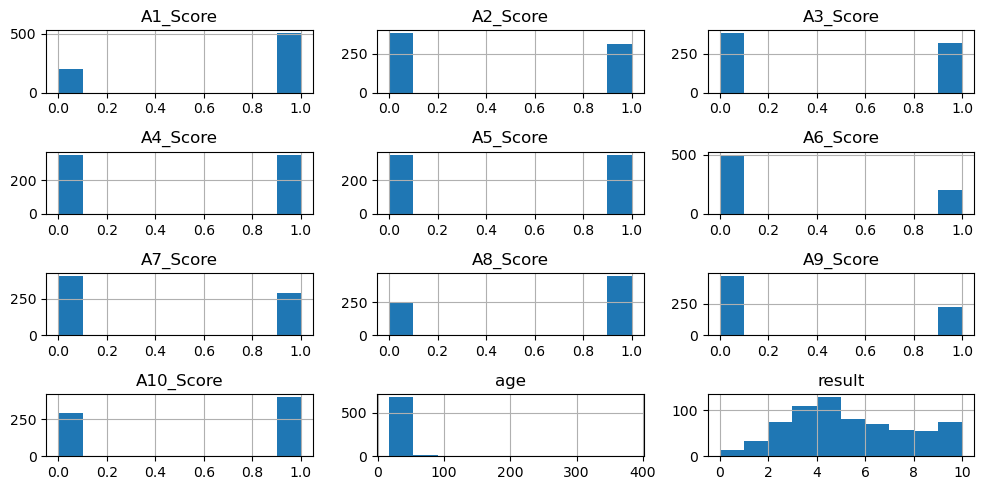

In [173]:
# show the histogram for each column in data
fig,ax=plt.subplots(figsize=(10,5))
data.hist(ax=ax)
plt.tight_layout()
plt.show()

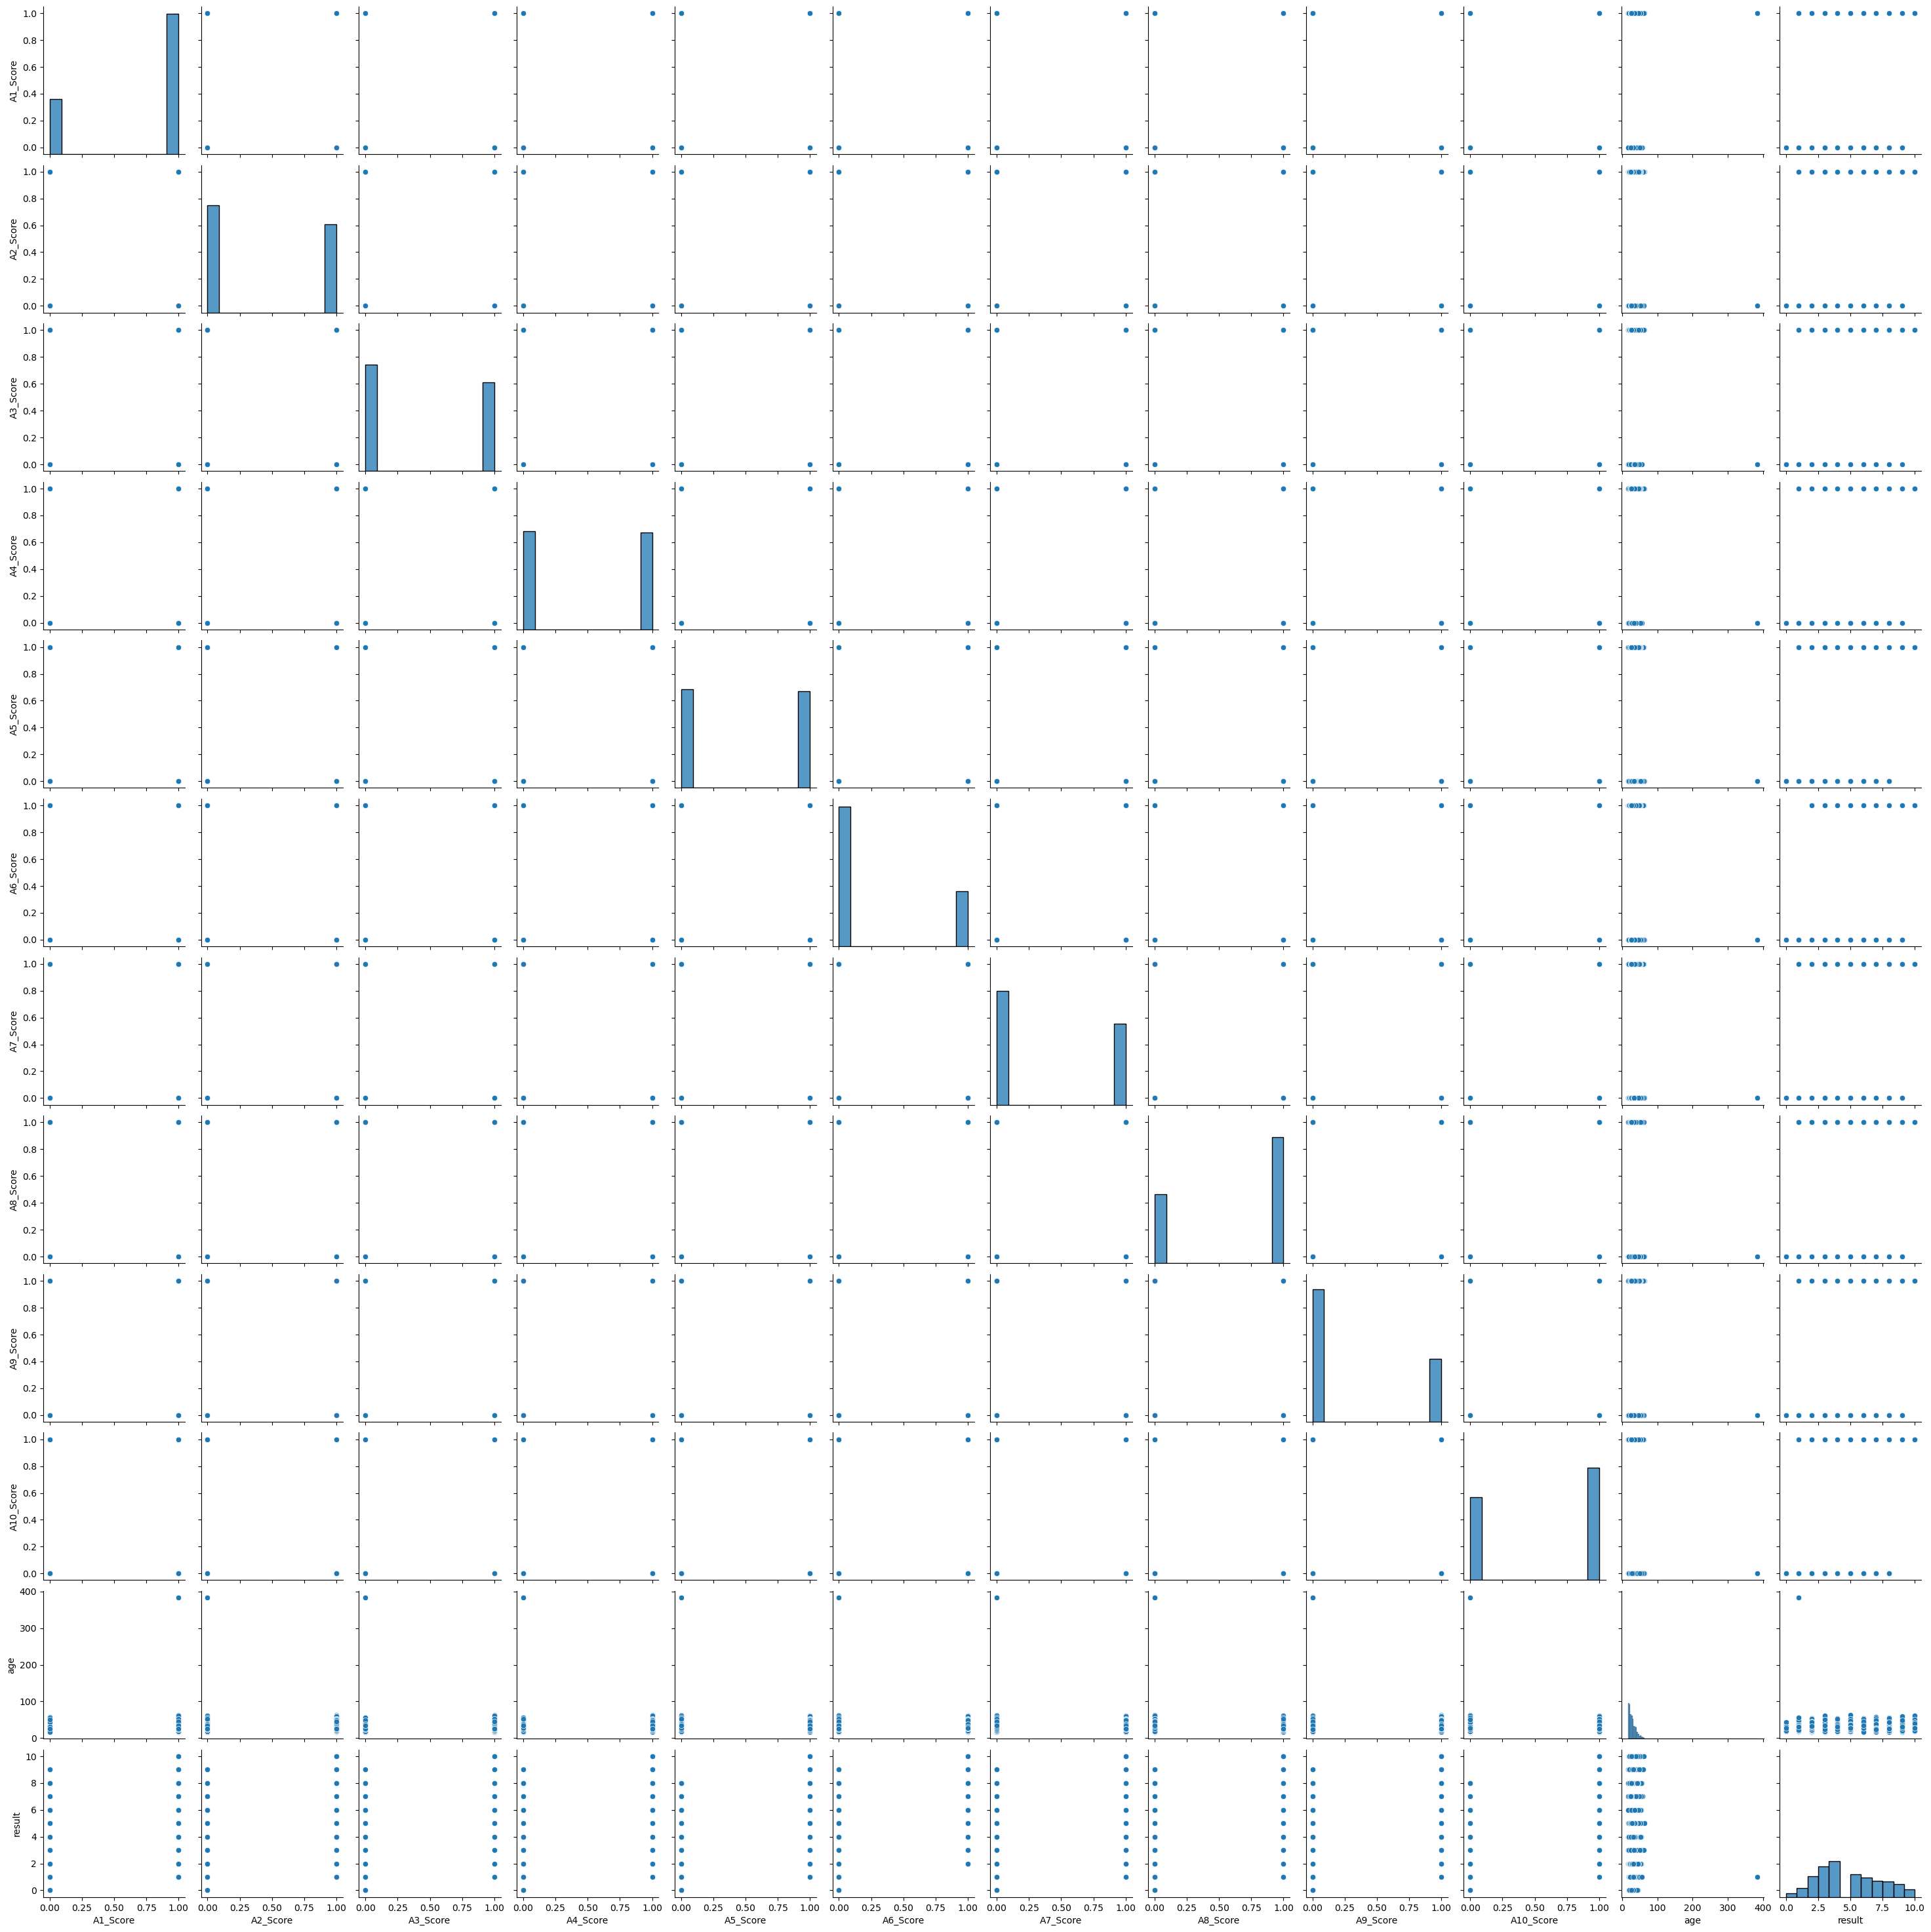

In [174]:
sns.pairplot(data)

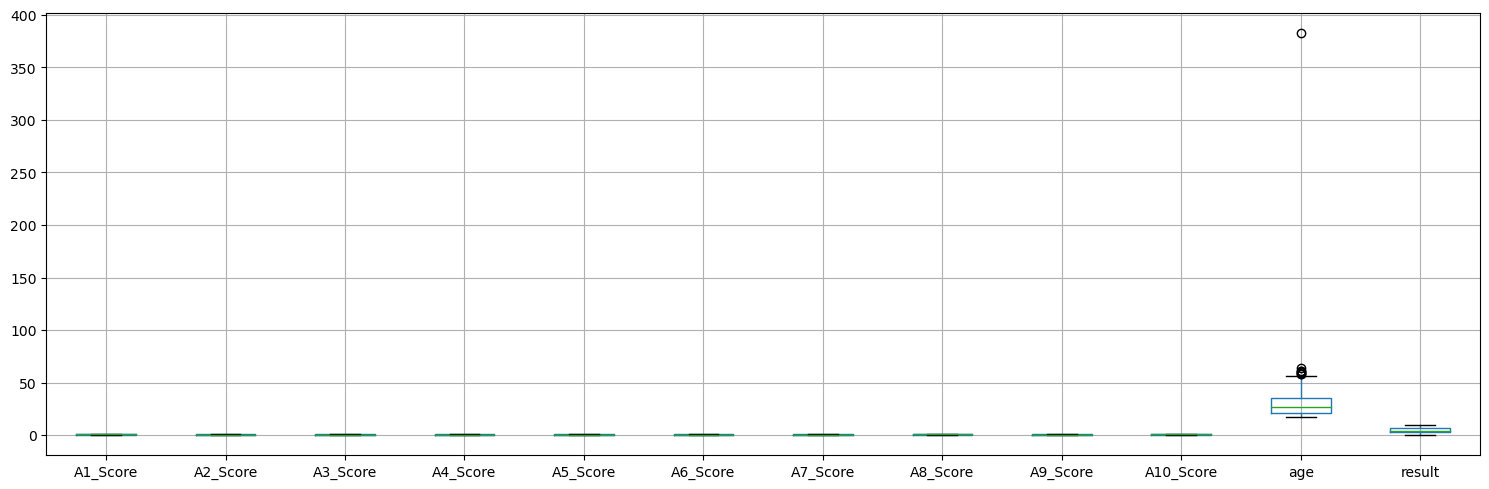

In [175]:
# check outliers using boxplot
fig,ax=plt.subplots(figsize=(15,5))
data.boxplot(ax=ax)
plt.tight_layout()
plt.show()

In [176]:
cat_col=data.select_dtypes(include=[object]).columns
labelen=LabelEncoder()
for col in cat_col:
    data[col]=labelen.fit_transform(data[col])

In [177]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 0 to 703
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   A1_Score         699 non-null    int64  
 1   A2_Score         699 non-null    int64  
 2   A3_Score         699 non-null    int64  
 3   A4_Score         699 non-null    int64  
 4   A5_Score         699 non-null    int64  
 5   A6_Score         699 non-null    int64  
 6   A7_Score         699 non-null    int64  
 7   A8_Score         699 non-null    int64  
 8   A9_Score         699 non-null    int64  
 9   A10_Score        699 non-null    int64  
 10  age              699 non-null    float64
 11  gender           699 non-null    int32  
 12  ethnicity        699 non-null    int32  
 13  jundice          699 non-null    int32  
 14  austim           699 non-null    int32  
 15  contry_of_res    699 non-null    int32  
 16  used_app_before  699 non-null    int32  
 17  result          

In [178]:
data.corr()["ASD"].sort_values()

gender            -0.084811
contry_of_res      0.014749
used_app_before    0.044528
age                0.053564
jundice            0.103374
relation           0.155343
austim             0.172940
A8_Score           0.237163
ethnicity          0.262387
A1_Score           0.298109
A2_Score           0.310019
A7_Score           0.348458
A10_Score          0.382165
A3_Score           0.440847
A4_Score           0.466482
A5_Score           0.537583
A6_Score           0.588360
A9_Score           0.632476
result             0.820130
ASD                1.000000
age_desc                NaN
Name: ASD, dtype: float64

In [179]:
data=data.drop(["gender","used_app_before","age","jundice","austim","contry_of_res","result","age_desc"],axis=1)

In [188]:
data=data.drop(["relation","ethnicity"],axis=1)

In [189]:
data["ASD"].value_counts() # solve inbalance using SMOTE

0    512
1    187
Name: ASD, dtype: int64

In [190]:
features = data.drop("ASD",axis=1)
target=data["ASD"]

In [191]:
SM=SMOTE()
X_SM_sampled,y_SM_sampled=SM.fit_resample(features,target)

In [215]:
X_train,X_test,y_train,y_test=train_test_split(X_SM_sampled,y_SM_sampled,test_size=0.35,random_state=0)

In [216]:
# logistic regression model
LR=LogisticRegression()
LR.fit(X_train,y_train)

LogisticRegression()

In [217]:
log_pred=LR.predict(X_test)

In [218]:
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       175
           1       0.97      0.99      0.98       184

    accuracy                           0.98       359
   macro avg       0.98      0.98      0.98       359
weighted avg       0.98      0.98      0.98       359



In [219]:
LR.score(X_train,y_train)

0.9909774436090225

In [223]:
rfc=RandomForestClassifier(n_estimators=50,criterion="gini",max_depth=5)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_estimators=50)

In [224]:
rfc_pred=rfc.predict(X_test)

In [225]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.99      0.95      0.97       175
           1       0.96      0.99      0.98       184

    accuracy                           0.97       359
   macro avg       0.98      0.97      0.97       359
weighted avg       0.98      0.97      0.97       359



In [226]:
rfc.score(X_train,y_train)

0.9834586466165414

In [228]:
DSC = DecisionTreeClassifier(max_depth = 5, criterion= "entropy" , random_state = 0  )
DSC.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=0)

In [230]:
DSC_Y_pred = DSC.predict(X_test)


In [231]:
print(classification_report(y_test,DSC_Y_pred))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       175
           1       0.92      0.97      0.94       184

    accuracy                           0.94       359
   macro avg       0.94      0.94      0.94       359
weighted avg       0.94      0.94      0.94       359



In [232]:
DSC.score(X_train,y_train)

0.9473684210526315